In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
class LinearRegression():
    def __init__(self, lr=1e-3, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            y_pred = np.dot(X, self.w) + self.b

            dw = (1 / n_samples) * np.dot(X.T, y_pred - y)
            db = (1 / n_samples) * np.sum(y_pred - y)

            self.w -= self.lr * dw
            self.b -= self.lr * db

    def predict(self, X):
        return np.dot(X, self.w) + self.b

In [3]:
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

In [4]:
X, y = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [5]:
X.shape, y.shape

((100, 1), (100,))

In [6]:
X[42], y[42]

(array([-1.36096559]), -77.78704394495927)

In [7]:
model = LinearRegression(lr=1e-2)
model.fit(X_train, y_train)

In [8]:
model.w, model.b

(array([75.05642756]), -0.14185705476881272)

In [9]:
y_pred = model.predict(X_test)
mean_squared_error(y_test, y_pred)

305.7719958301902

In [10]:
y_pred_line = model.predict(X)

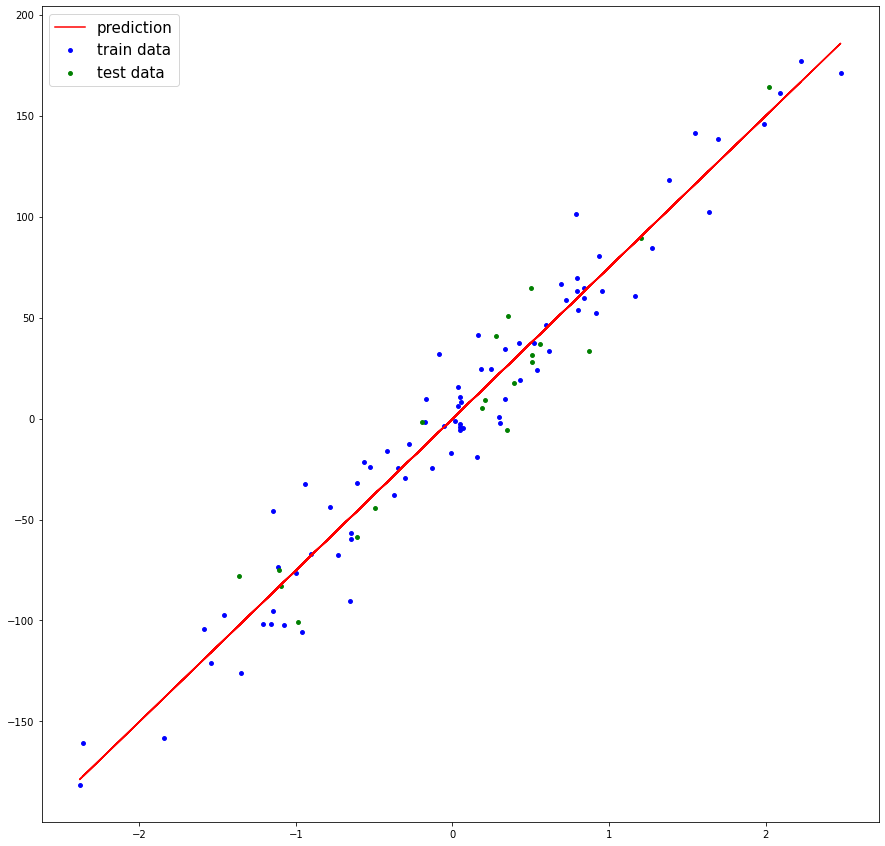

In [11]:
figure, axes = plt.subplots(figsize = (15, 15))
axes.scatter(X_train, y_train, color="blue", s=15, label="train data")
axes.scatter(X_test, y_test, color="green", s=15, label="test data")
axes.plot(X, y_pred_line, color="red", label="prediction")
axes.legend(fontsize=15)